<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_20_Seaborn Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Top Companies Bar Plot (2.20.1)

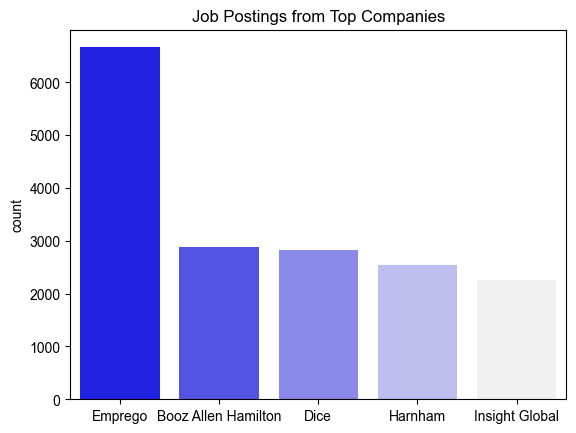

In [99]:
company_df = df['company_name'].value_counts().head().reset_index().copy()

sns.barplot(data=company_df, x='company_name', y='count', hue='company_name', palette='light:b_r', legend=False)
sns.set_theme(style='ticks')
plt.title('Job Postings from Top Companies')
plt.xlabel('')
plt.show()


---

## 🟨 Data Scientist Salary Histogram (2.20.2)

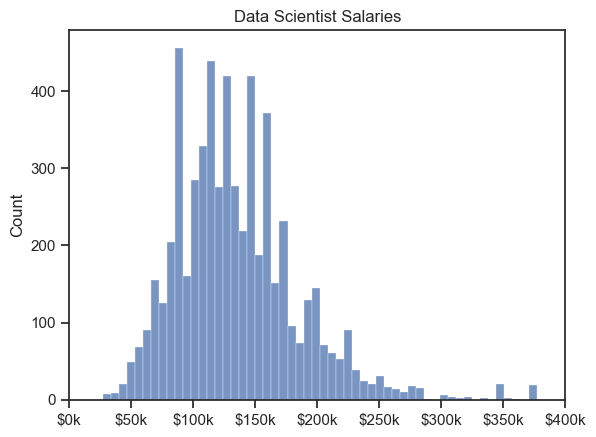

In [100]:
data_salary_df = df[df['job_title_short'] == 'Data Scientist'].copy()

sns.histplot(data=data_salary_df, x='salary_year_avg')
plt.xlim(0, 400000)
plt.title('Data Scientist Salaries')
plt.xlabel('')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))


---

## 🟨 Data Roles Salary Box Plot (2.20.3)

Text(0.5, 1.0, 'Data Role Salaries')

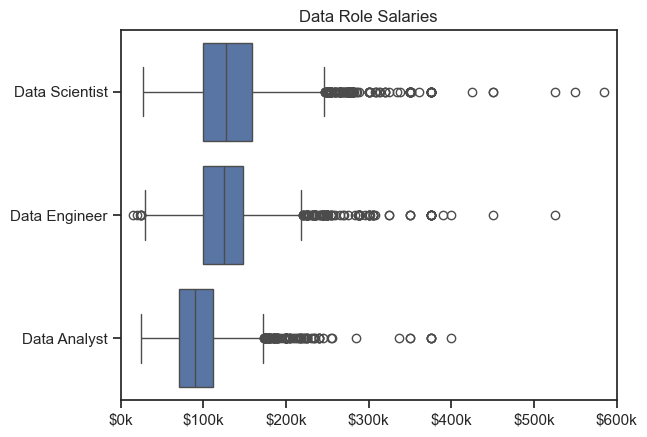

In [101]:
# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']


data_job_df = df.dropna(subset='salary_year_avg').copy()
data_job_df = data_job_df[data_job_df['job_title_short'].isin(job_titles)]

sns.boxplot(data=data_job_df, y='job_title_short', x='salary_year_avg')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.xlim(0, 600000)
plt.ylabel('')
plt.xlabel('')
plt.title('Data Role Salaries')

---

## 🟨 Salary Distribution for United States (2.20.4)

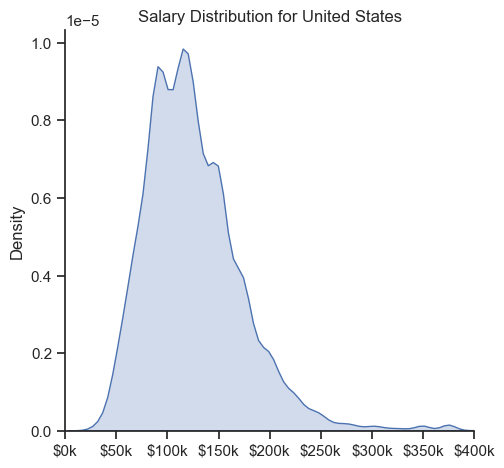

In [105]:
us_salary_df = df[df['job_country'] == 'United States'].copy()

us_salary_df.dropna(subset='salary_year_avg', inplace=True)

sns.displot(us_salary_df['salary_year_avg'], kind='kde', fill=True)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.xlim(0, 400000)
plt.xlabel('')
plt.title('Salary Distribution for United States')
plt.show()

---